# Employee Turnover Prediction

Name : Priyanka Pawar

Objective:  1. To Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company.
            2.To Identify Key Factors Influencing Employee Attrition.
I have used Logistic regression for prediction of employees that are likely to leave the company and Random forest for finding key factors.

#Importing Necessary Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#MODEL
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [3]:
data=pd.read_csv("C:/Priyanka/TechnoHacks Data Science Internship/HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

#Checking Dimensions of the dataset

In [5]:
data.shape

(1470, 35)

Comment: The Dataset contains 1470 observations with 35 variables

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#Checking for Missing Values

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Comment: There are no missing observations in the dataset.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Comment:1.The summary statistics shows, that the dataset is of 1470 employees , where average age is around 37 years.
        2. Key features like MonthlyIncome, TotalWorkingYears, and YearsAtCompany have  variability, that shows  a wide range of employee experiences.
        3. Also, there are  columns like EmployeeCount and StandardHours that have no variability, they might be constants.

# Univariate analysis

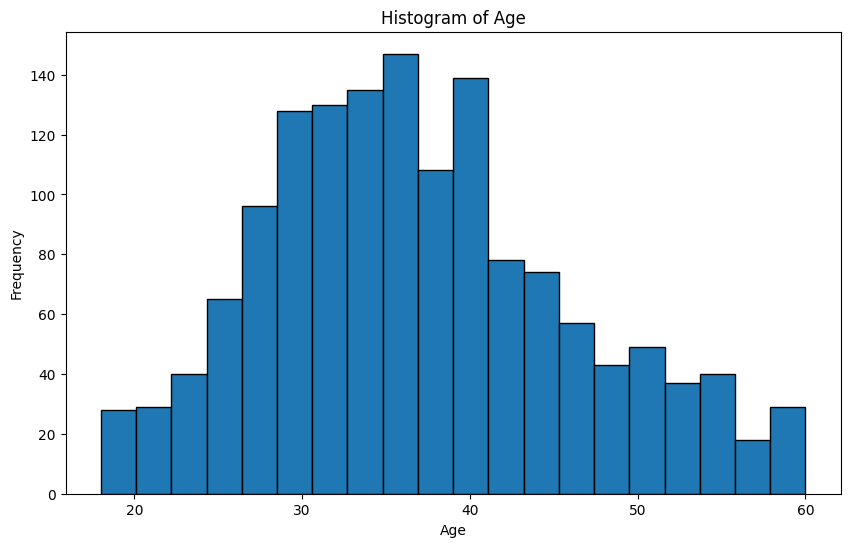

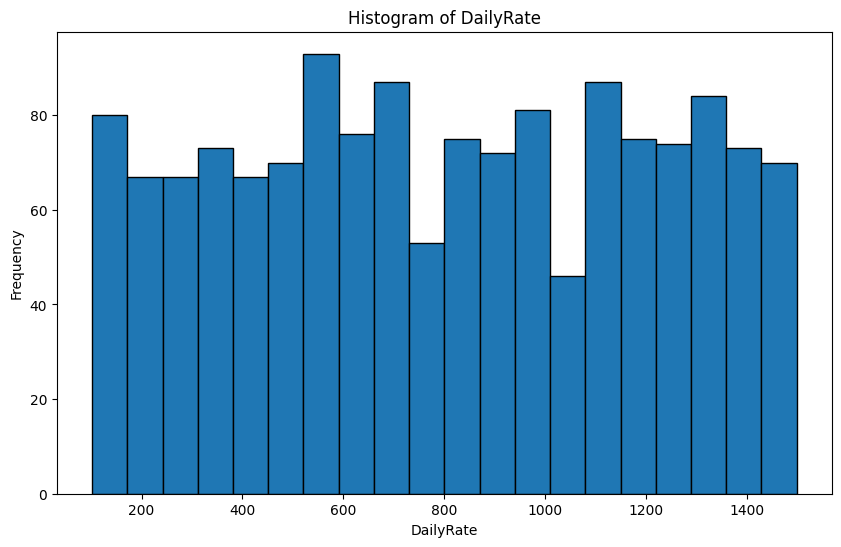

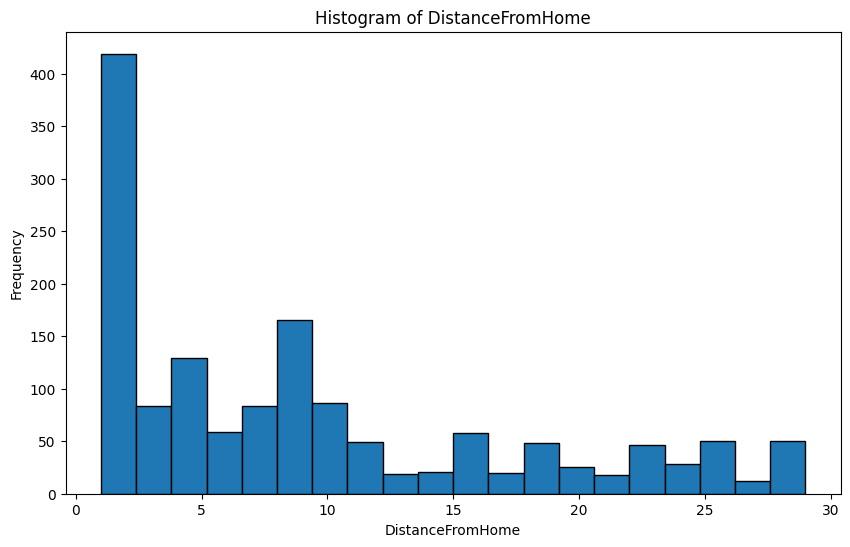

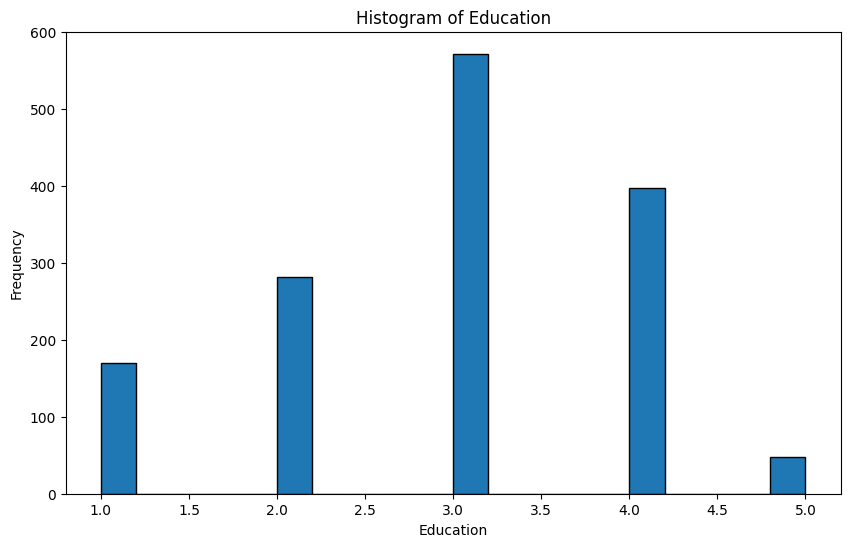

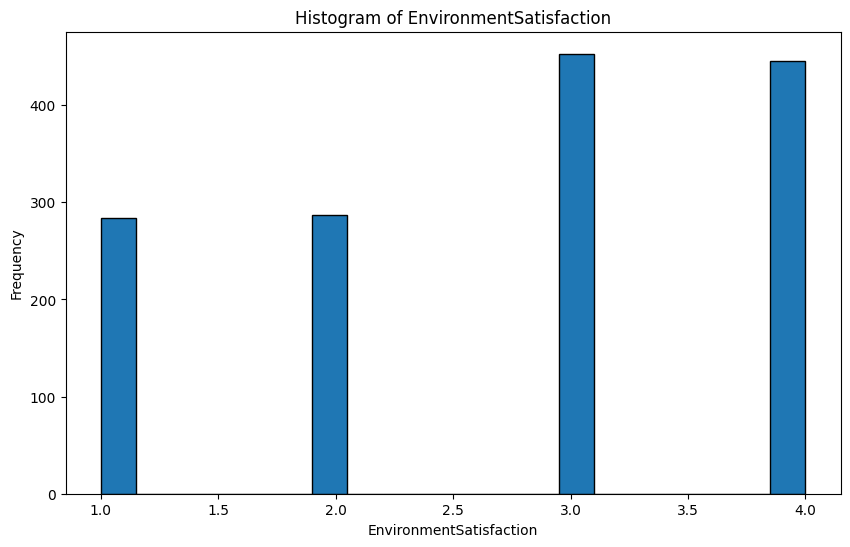

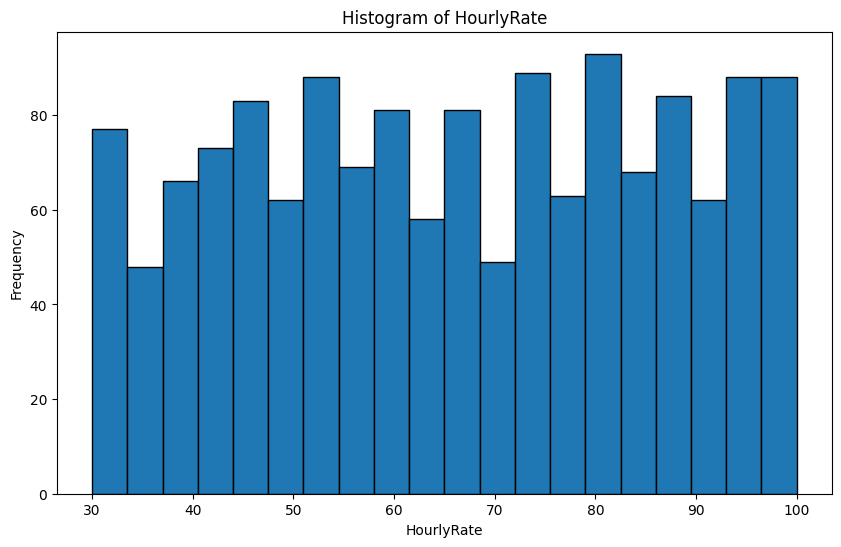

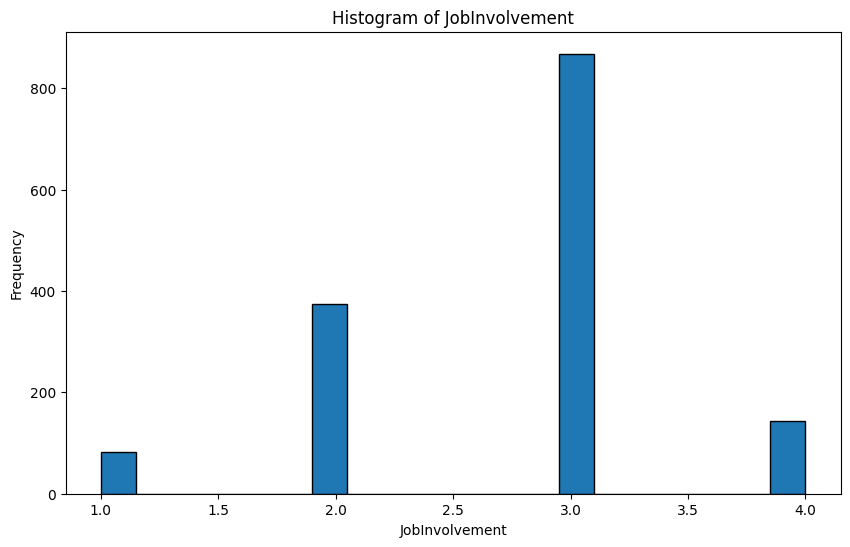

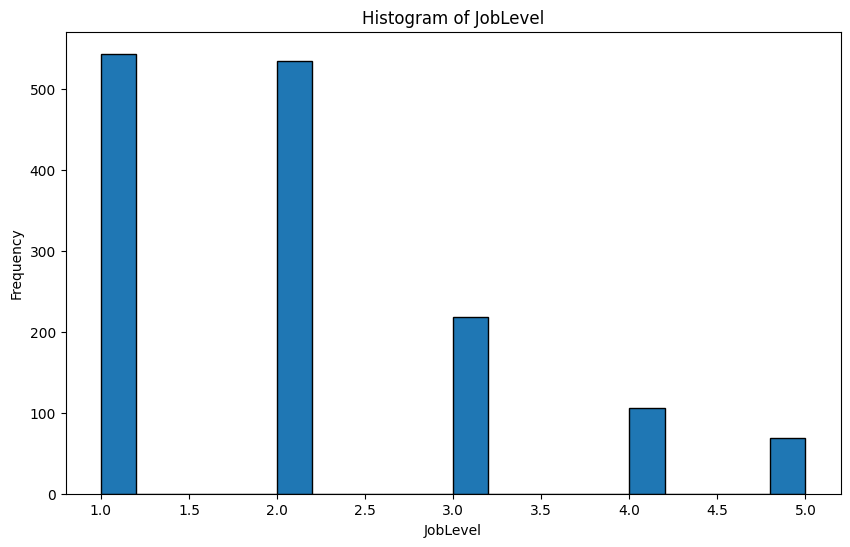

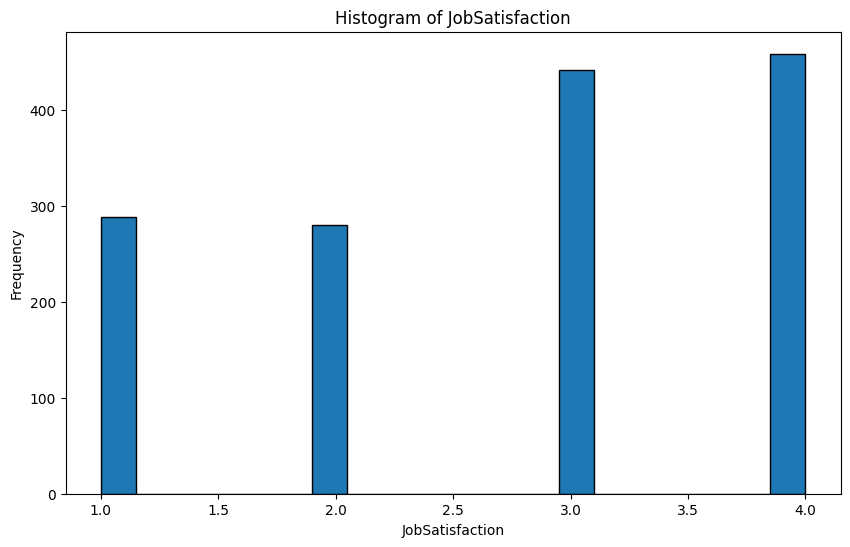

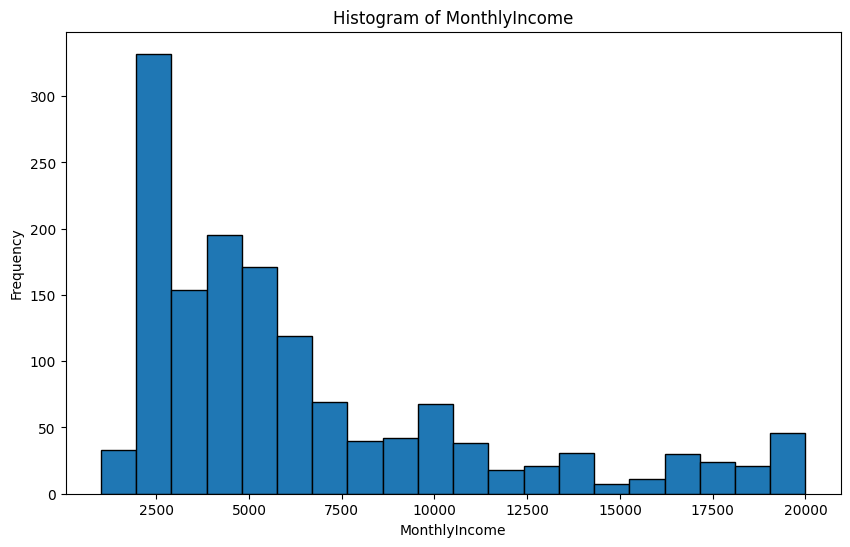

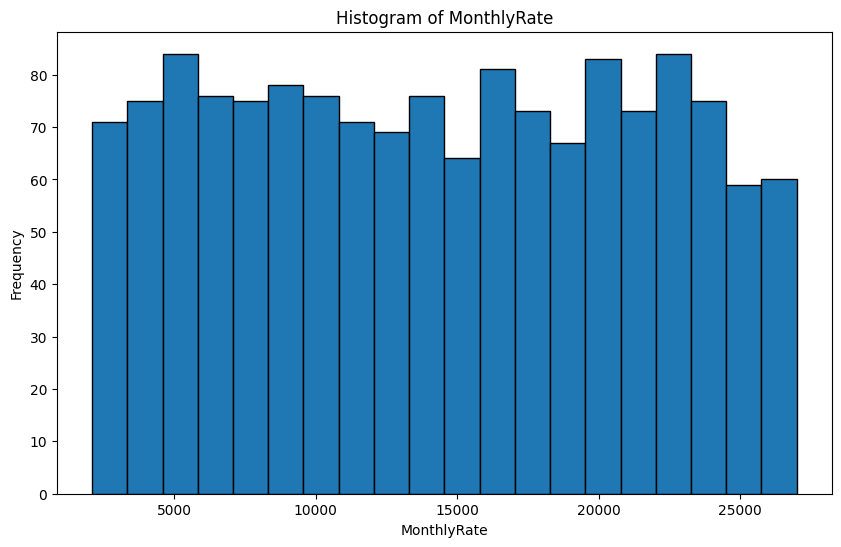

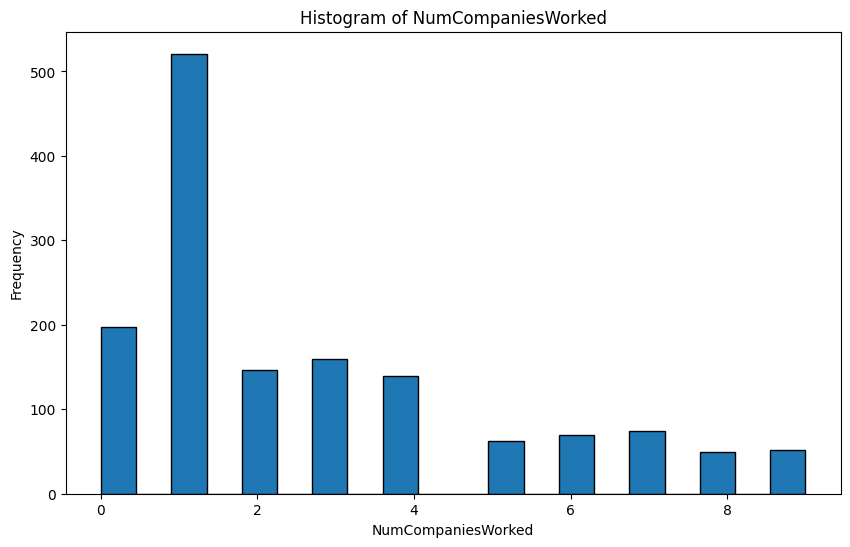

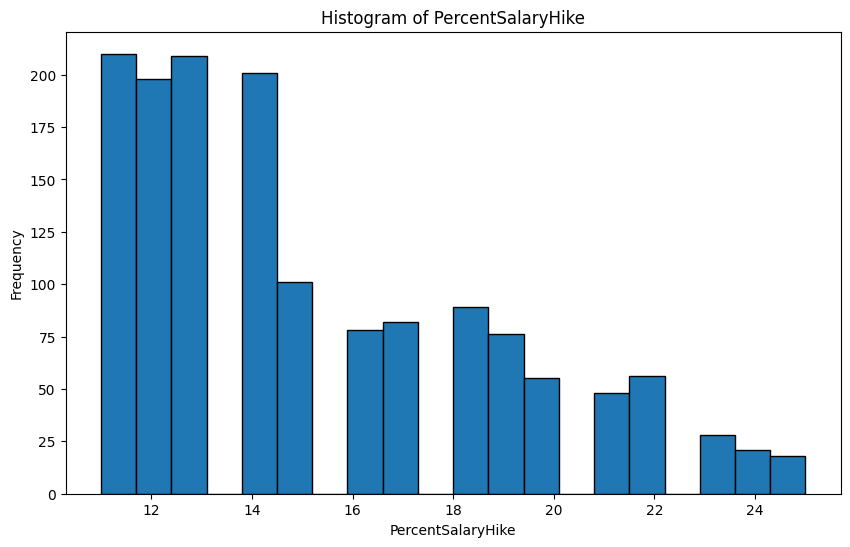

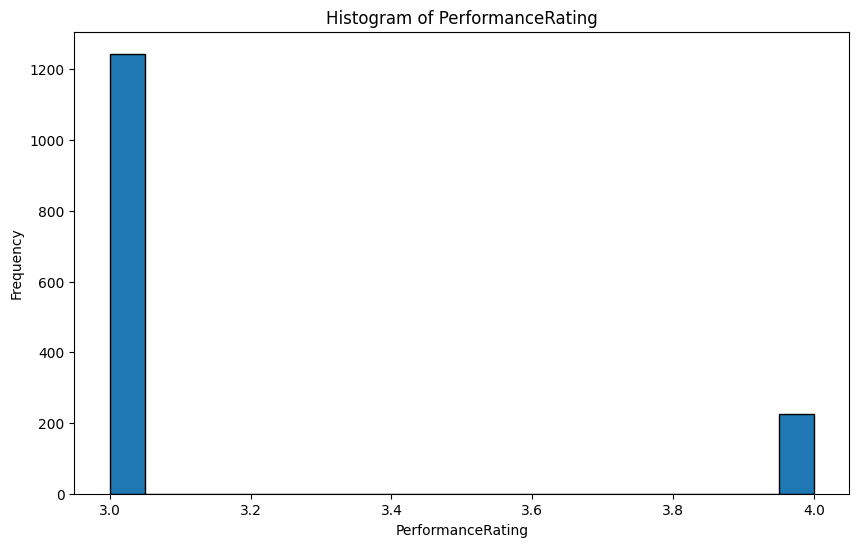

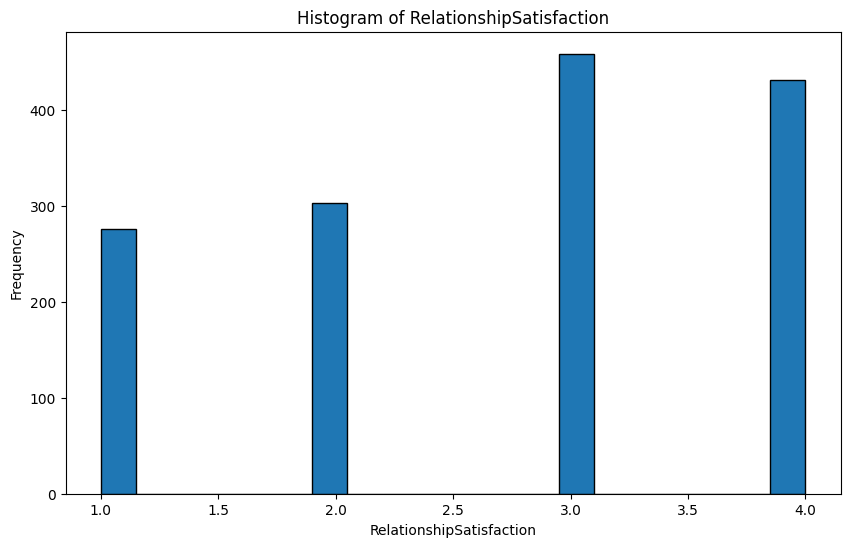

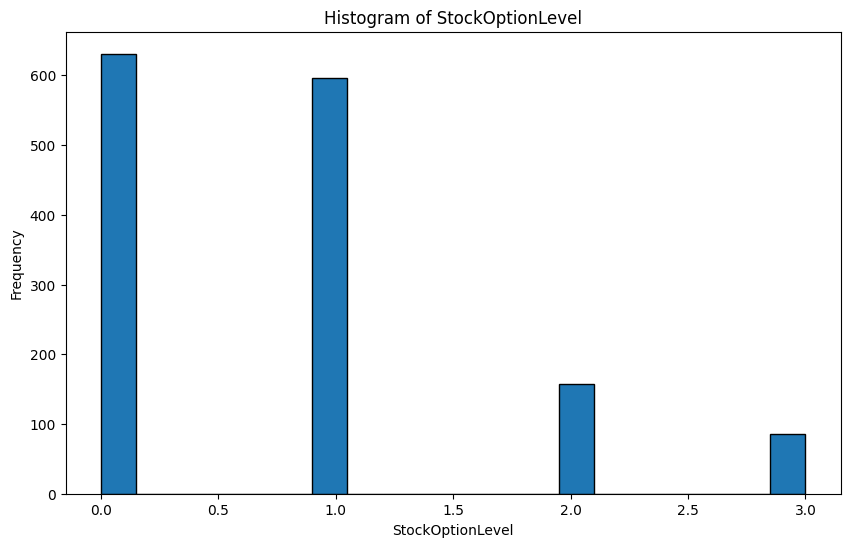

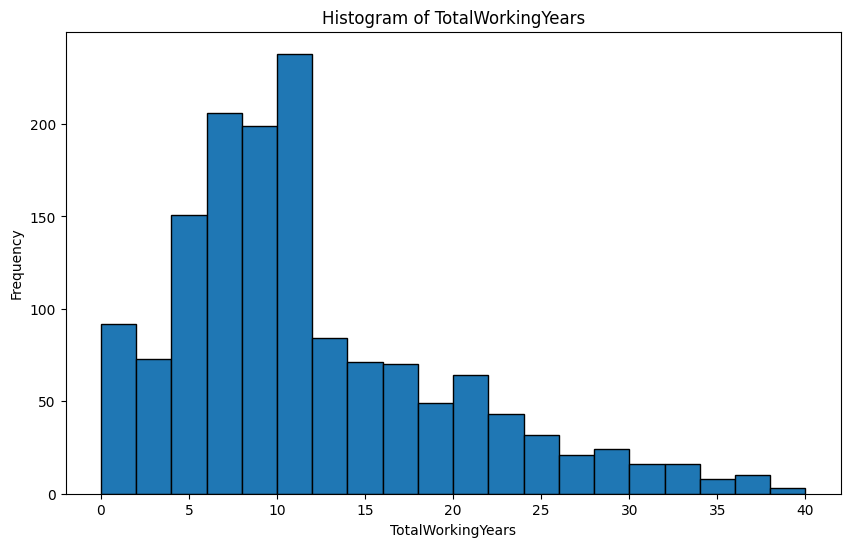

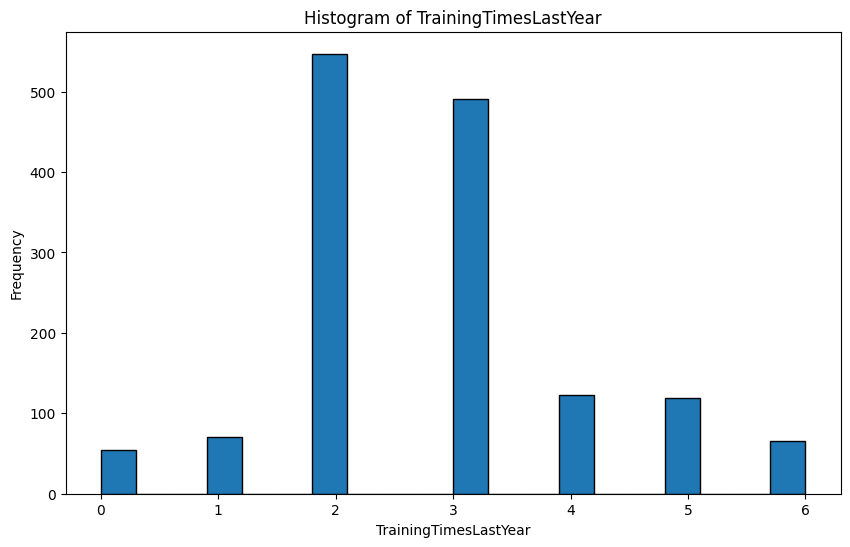

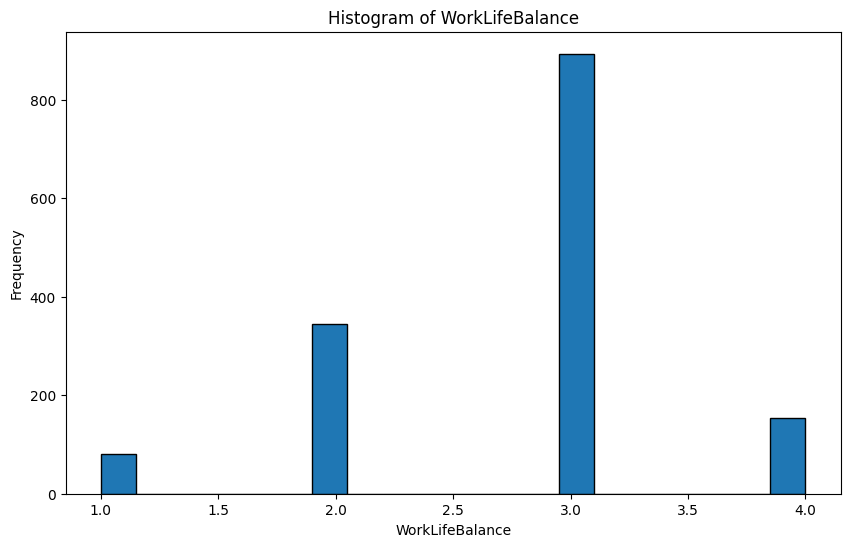

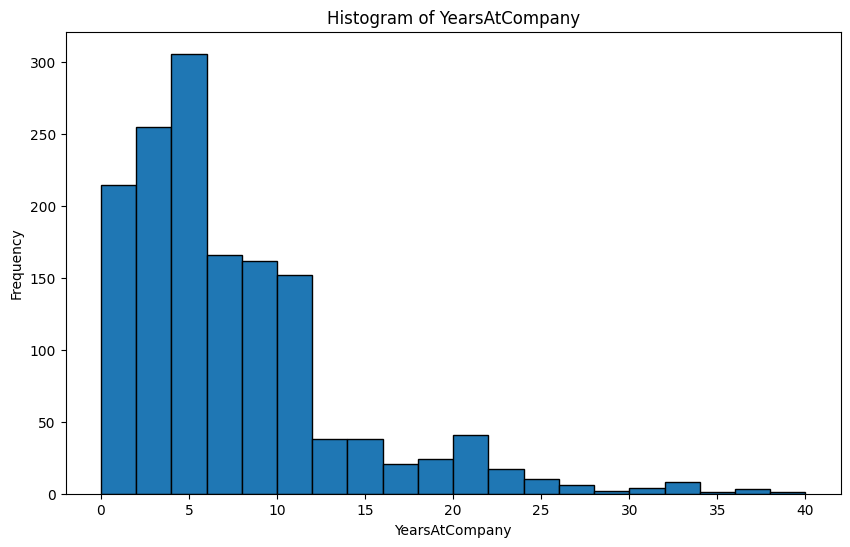

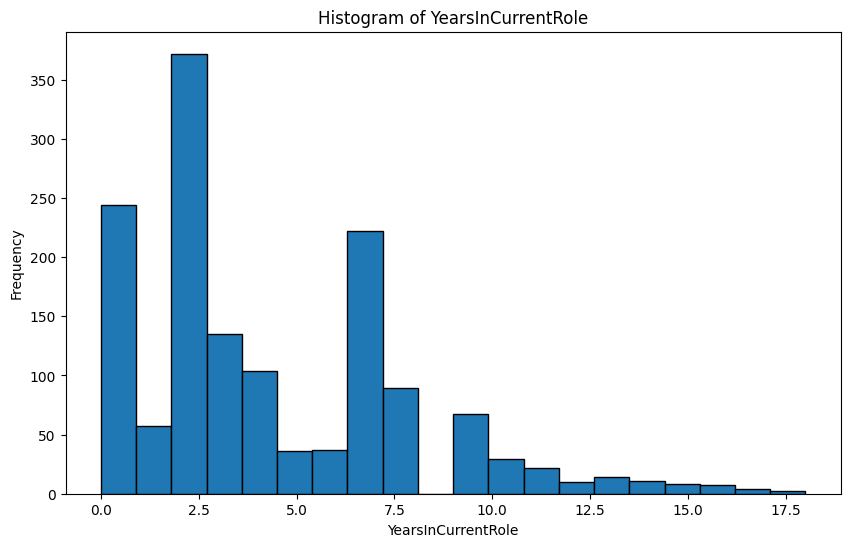

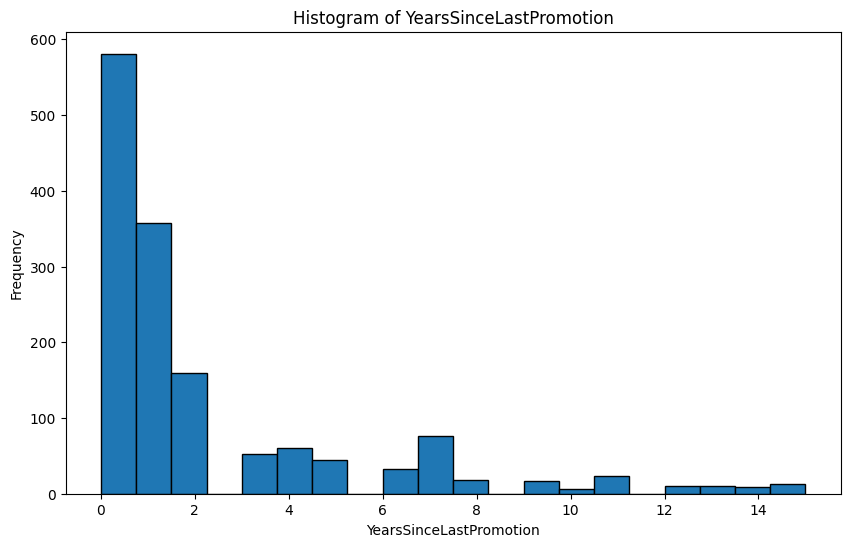

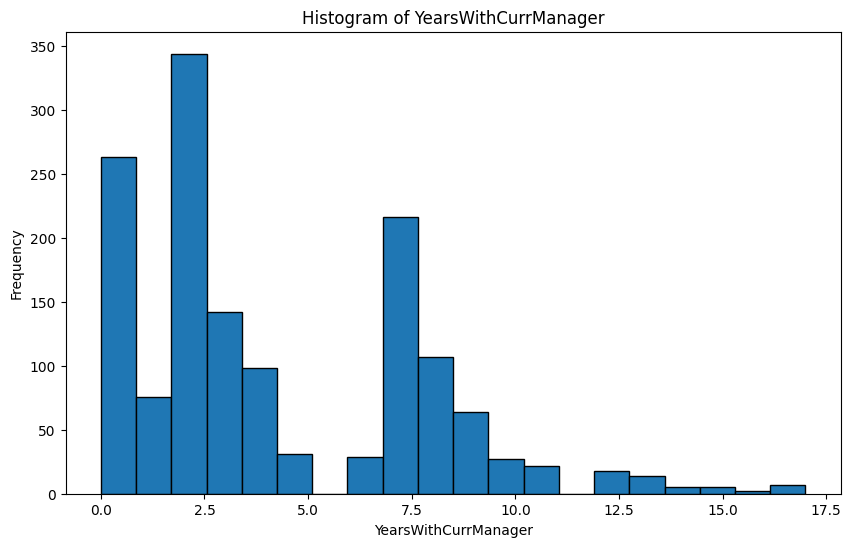

In [14]:
# Histogram for Numerical Columns

# Define numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                     'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                     'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
                     'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Comment: 1.The age distribution of employees appears to be normal, centered around the mid-30s to 40s.
         2.The daily rate of employees is uniformly distributed
         3.Most employees live  close to their workplace, with the majority staying less than 10 miles.
          Also, there are few employees living far.
         4.Most employees are at the lower job levels and very few employees at higher job levels.
        5.There are more employees earning less and fewer employees earning higher salaries.
        6.Monthly rate is uniformly distributed.
        7.We can see that, most employees have worked for a few companies before joining the current organization.
        8.There are a mix of long-term and newer employees, that have  been for number of years  at the company for approx 3 to 9 years.

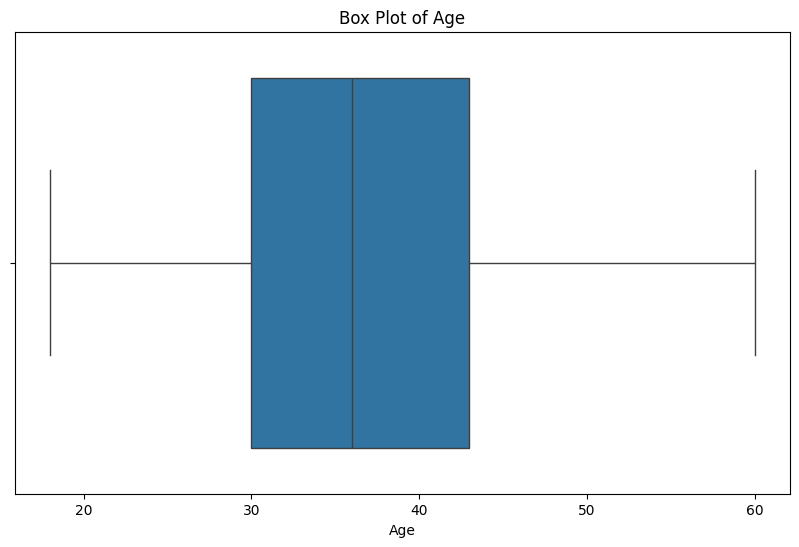

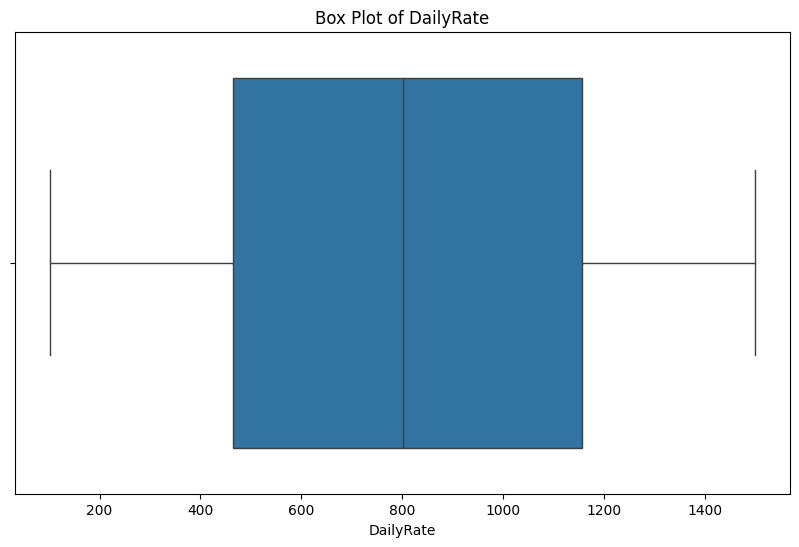

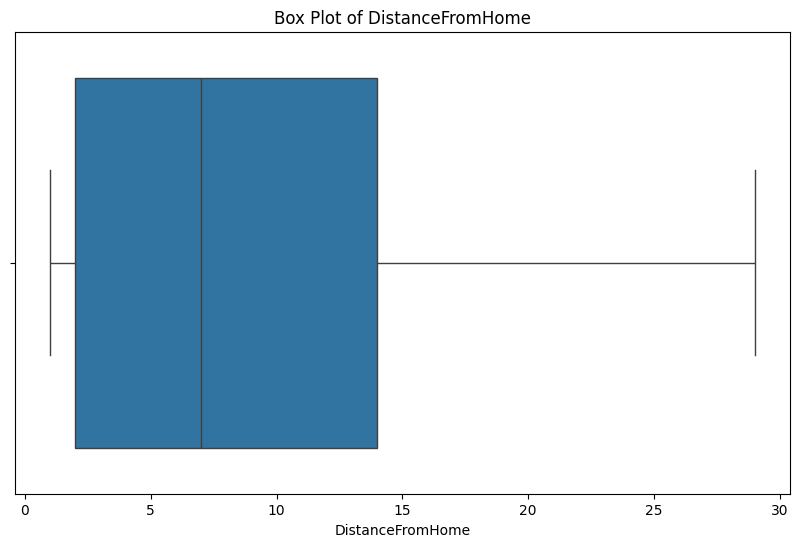

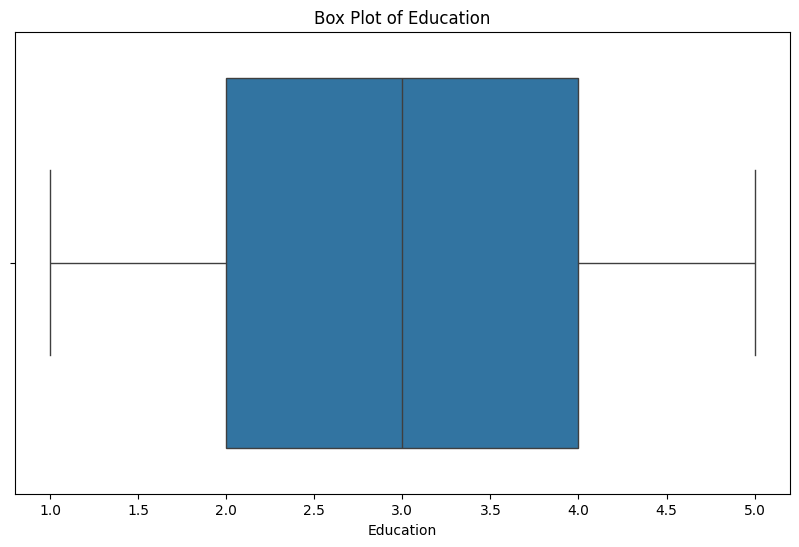

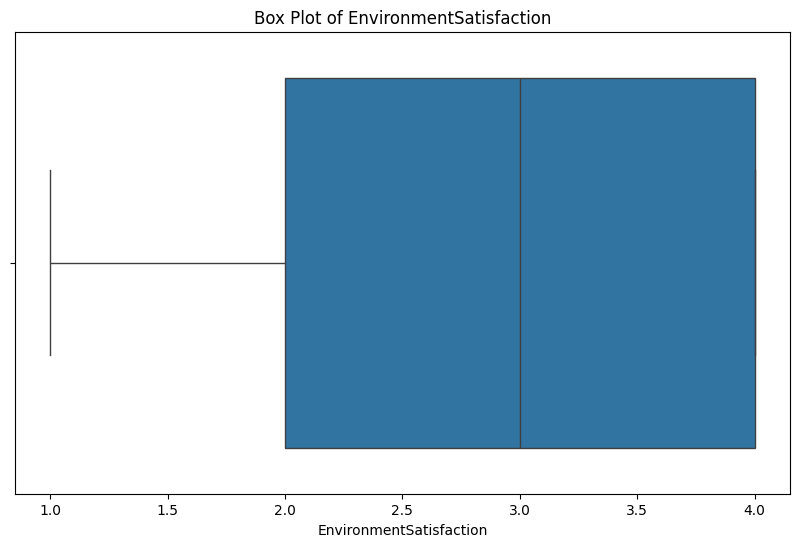

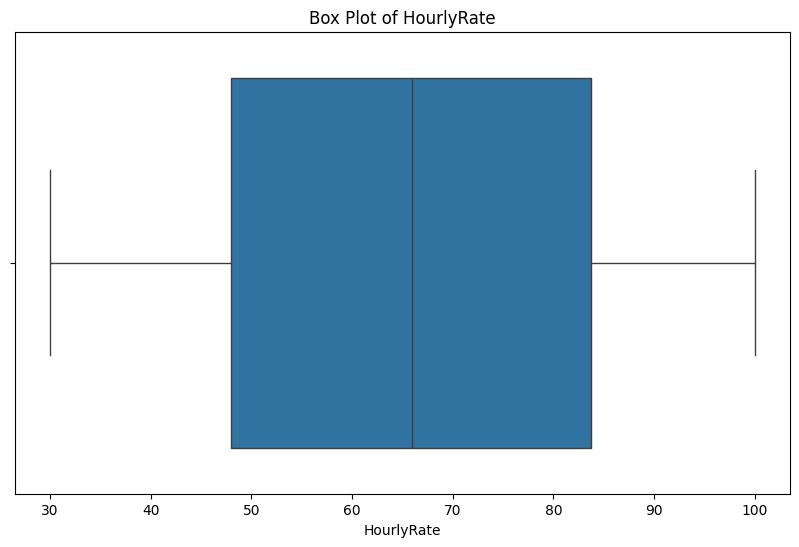

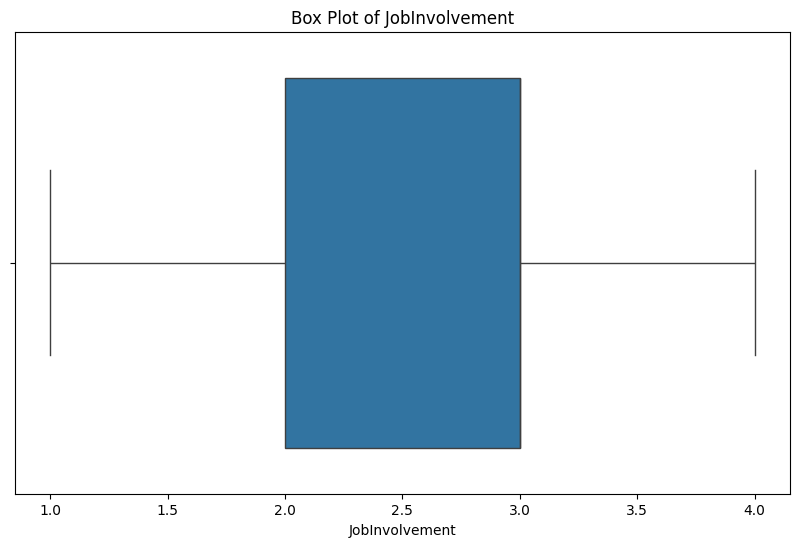

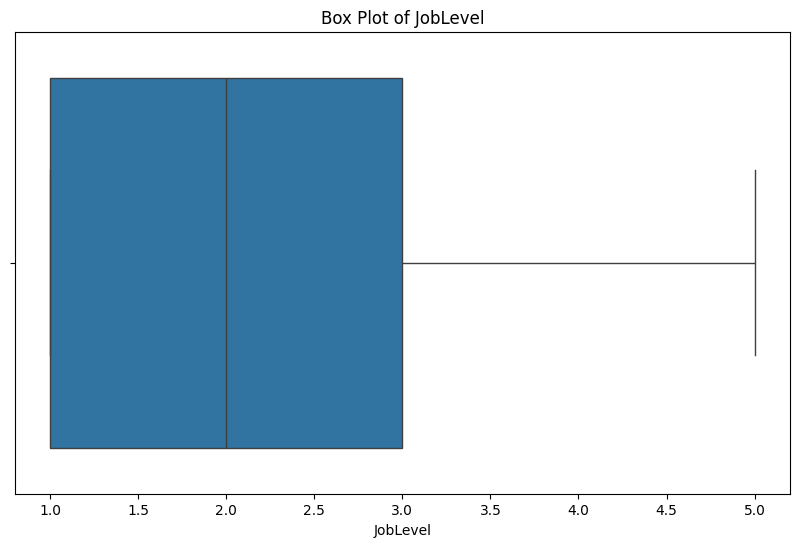

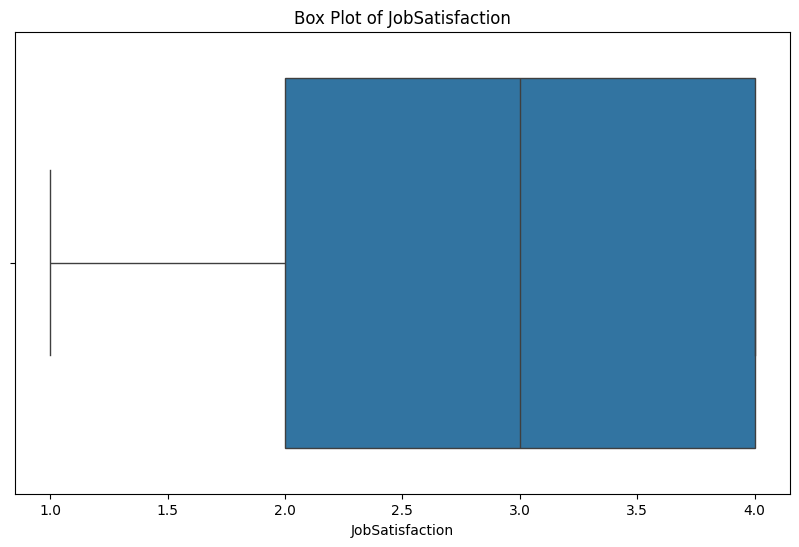

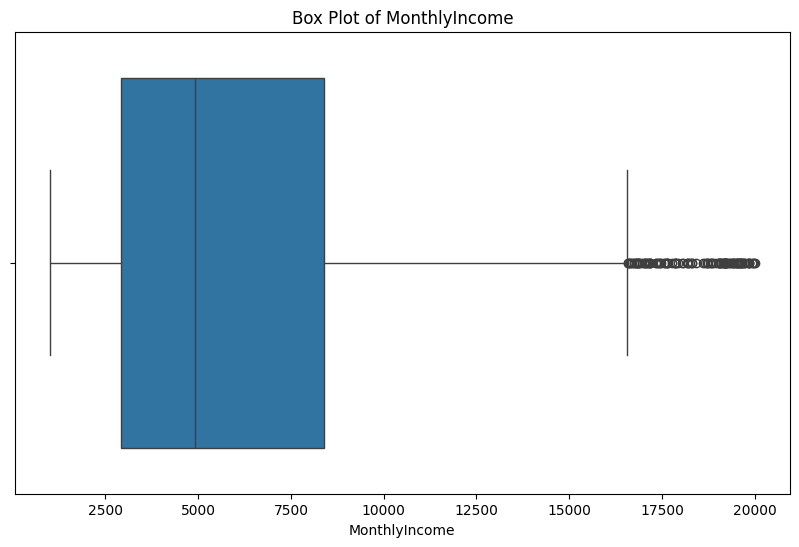

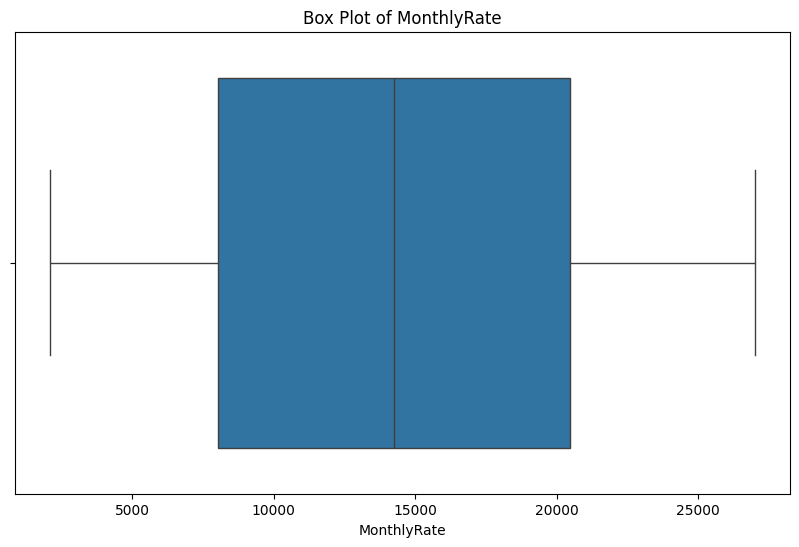

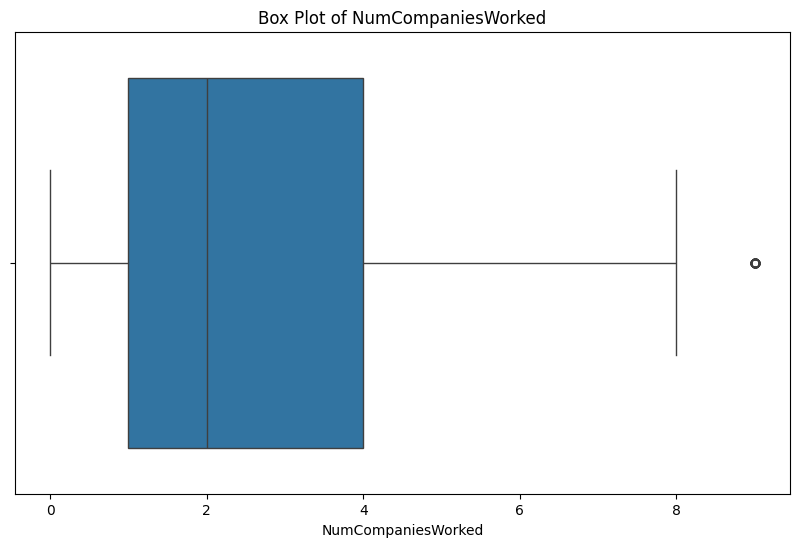

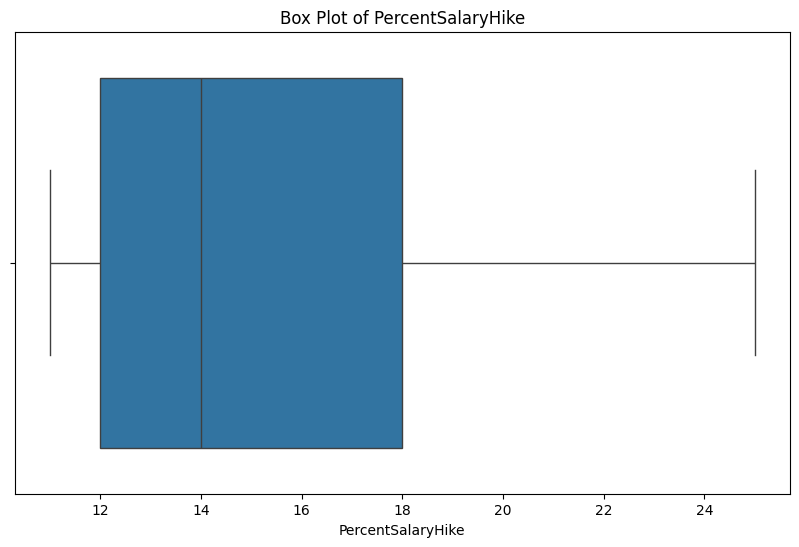

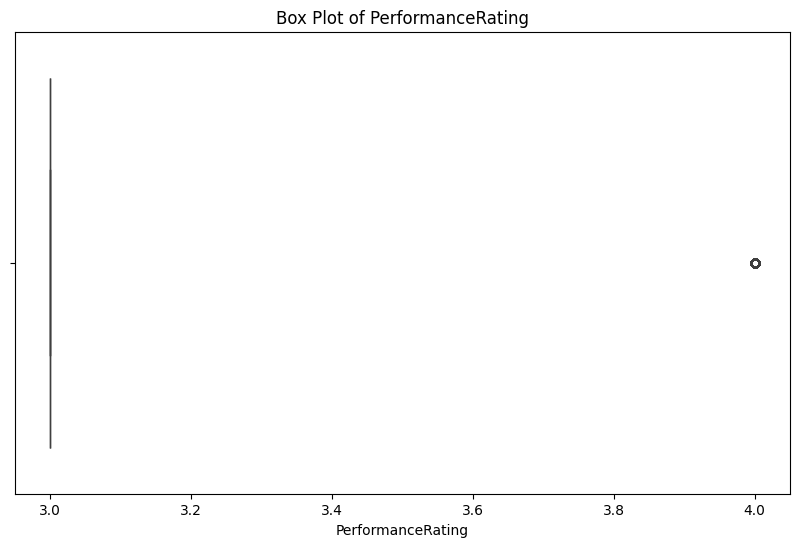

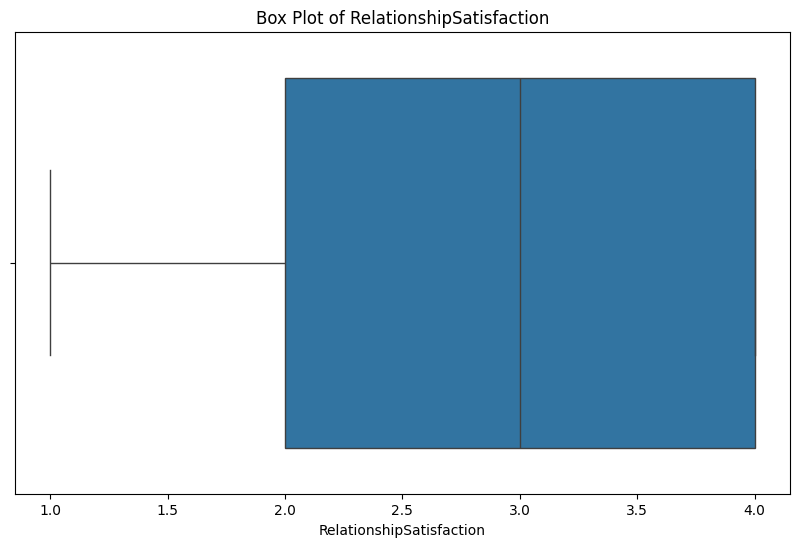

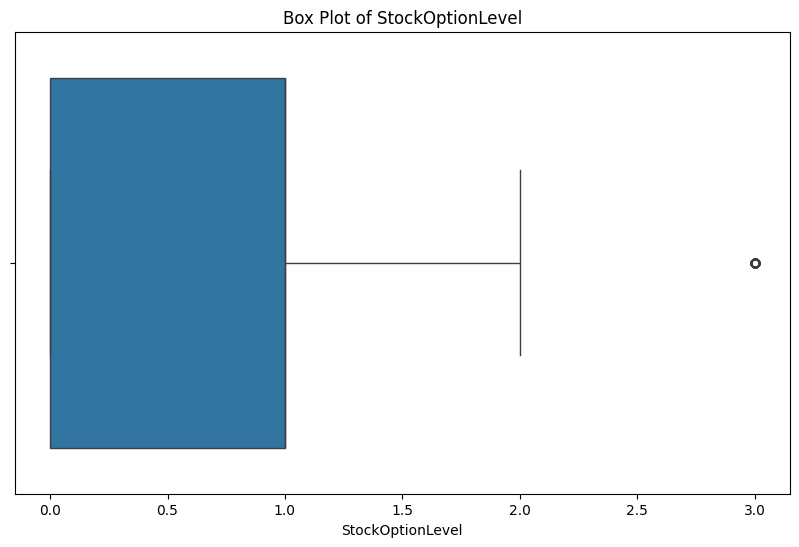

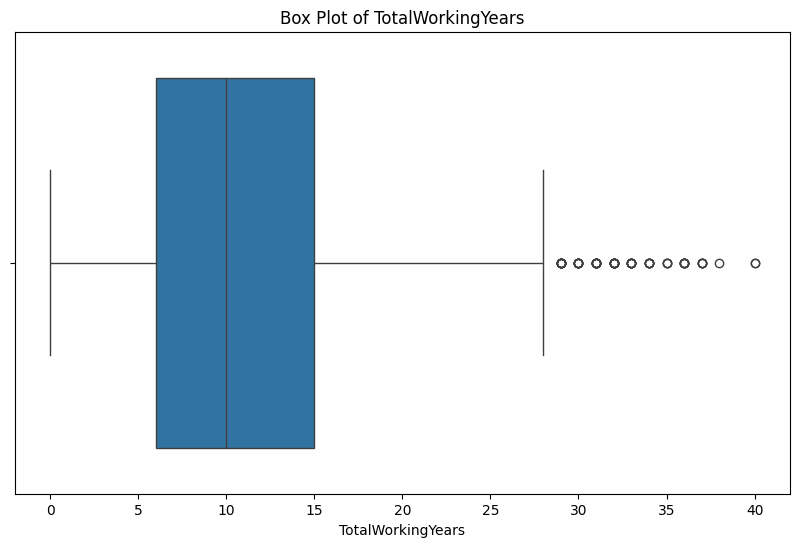

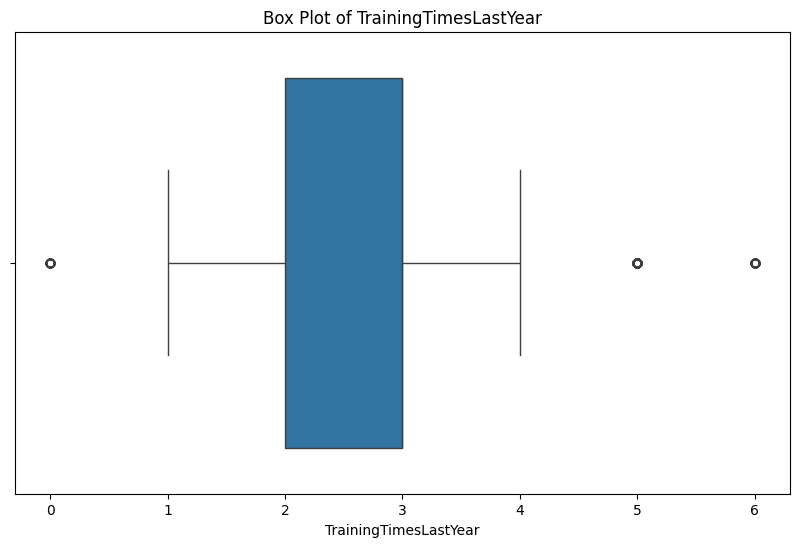

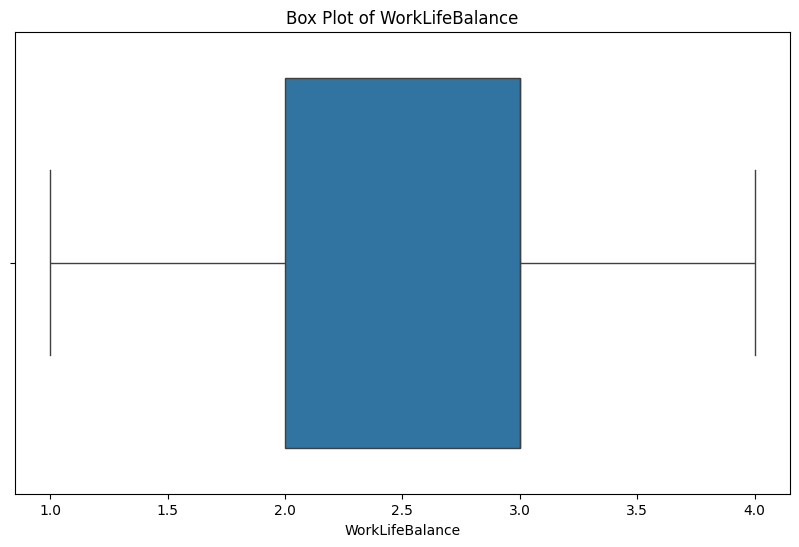

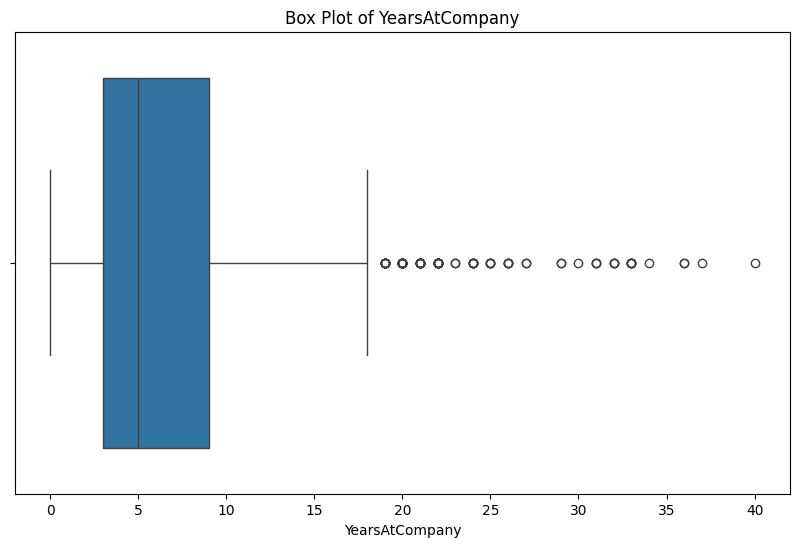

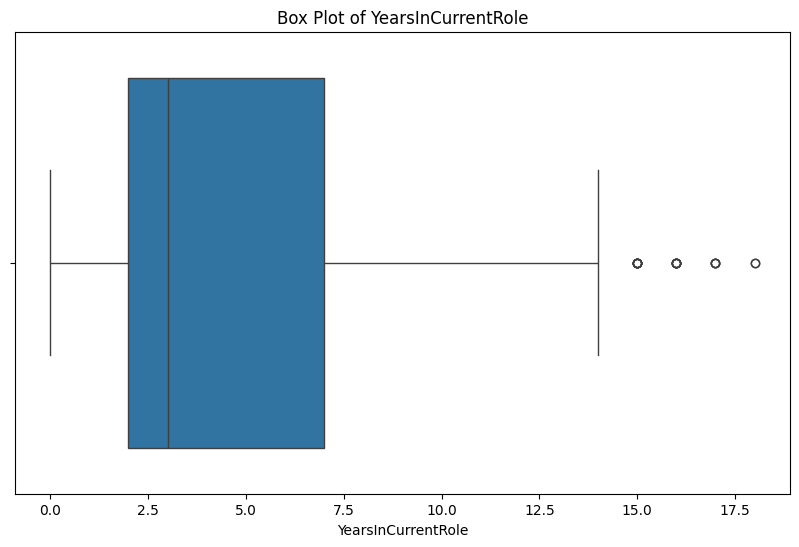

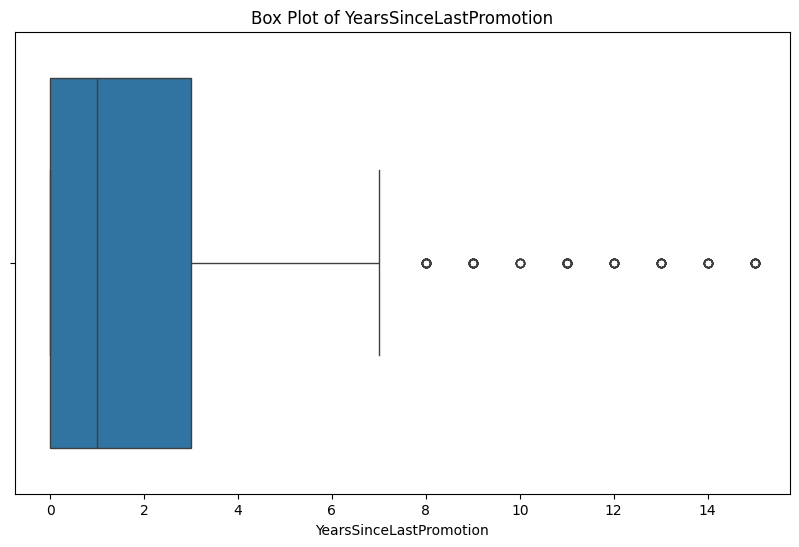

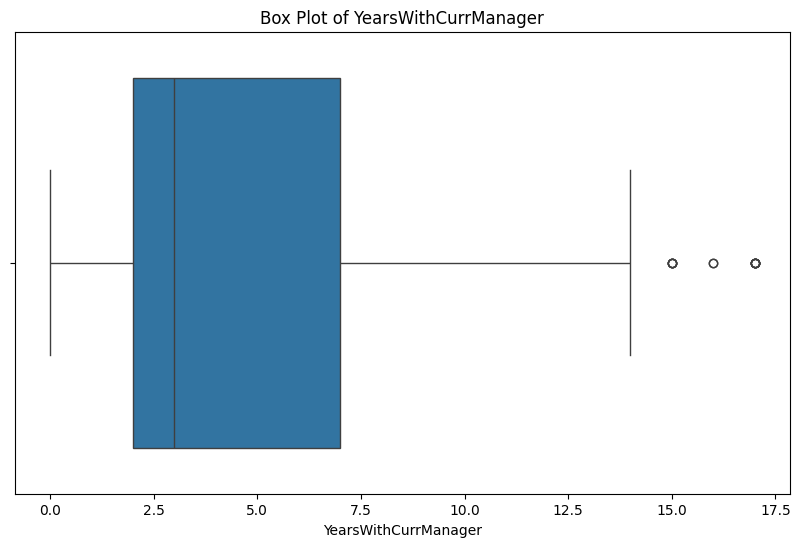

In [15]:
# Box Plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


Comment: 1. The box plot for Age shows a median around 36-37 years
         2. The DailyRate box plot indicates a wide range of daily rates with a median around 800. There are no outliers
            ,it implies a uniform distribution.
         3.The DistanceFromHome box plot shows that most employees live within 1 to 14 miles from work, with a median of around 7 miles. 
         4. The EnvironmentSatisfaction box plot shows a median satisfaction level of 3, with many employees rating their satisfaction 
            at levels 2, 3, and 4
         5. The JobSatisfaction box plot shows a median satisfaction level of 3.
        6. The MonthlyIncome box plot shows a median income around 5000. There are many outliers at the higher end,
          that shows a few employees with very high income
        7. The YearsAtCompany box plot shows a median of around 5 years.  
       8.The YearsInCurrentRole box plot shows a median of around 3 years.

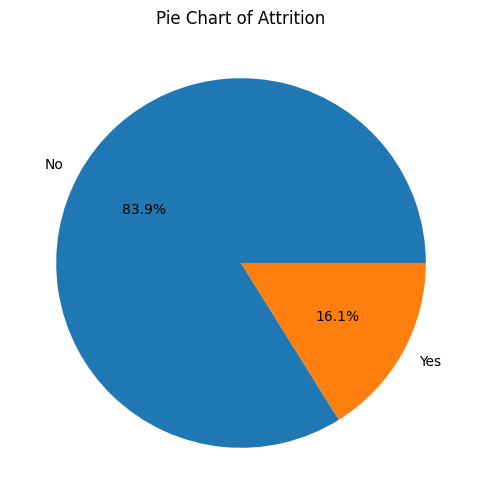

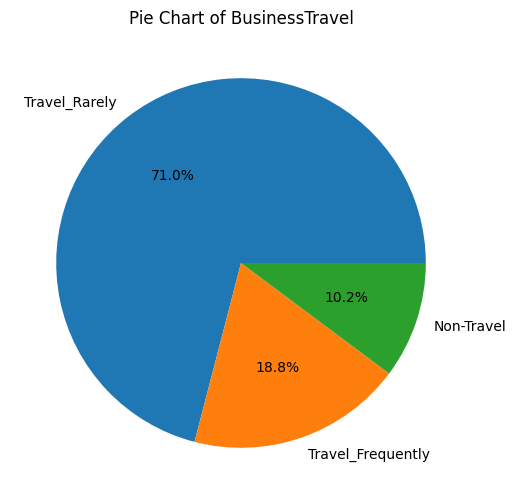

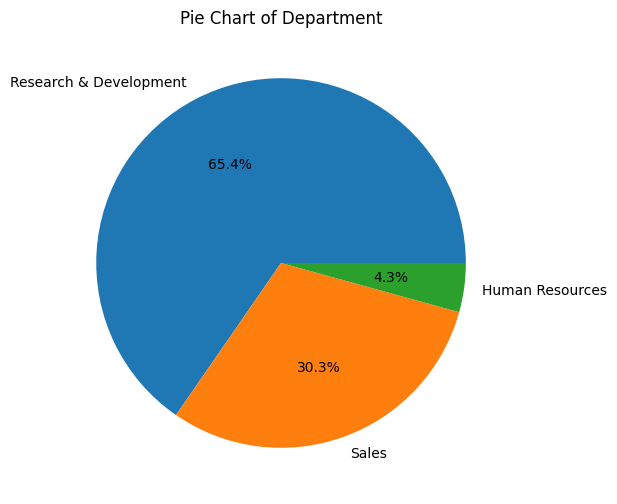

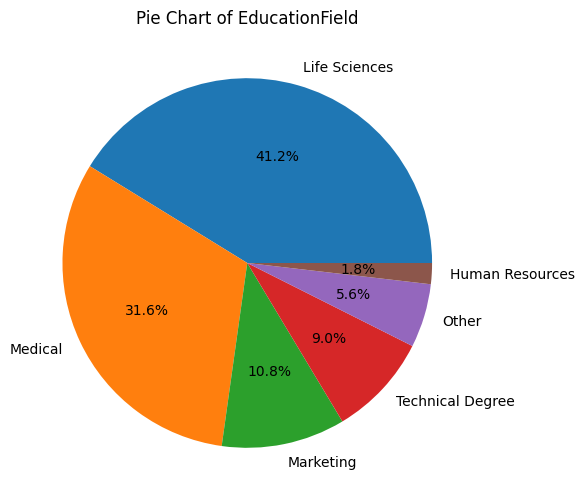

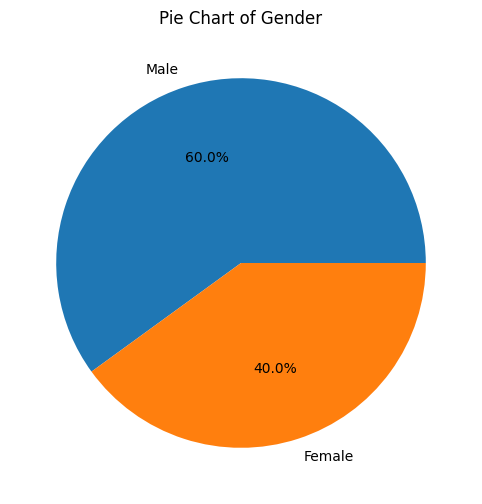

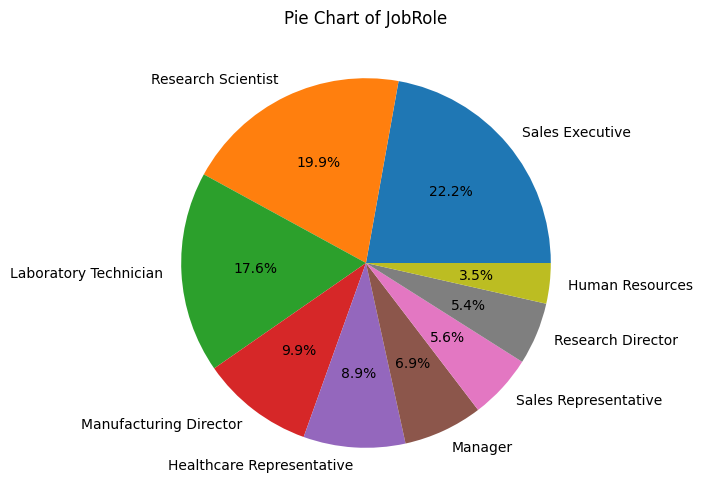

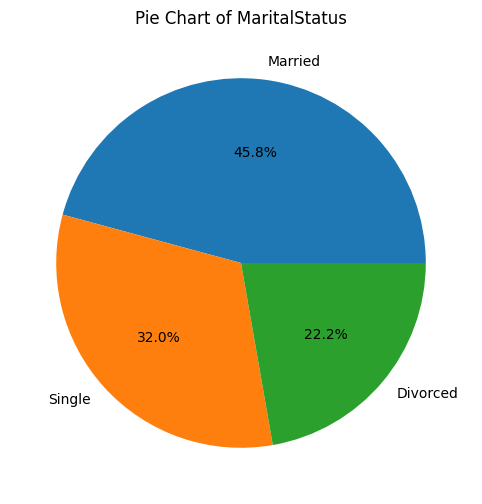

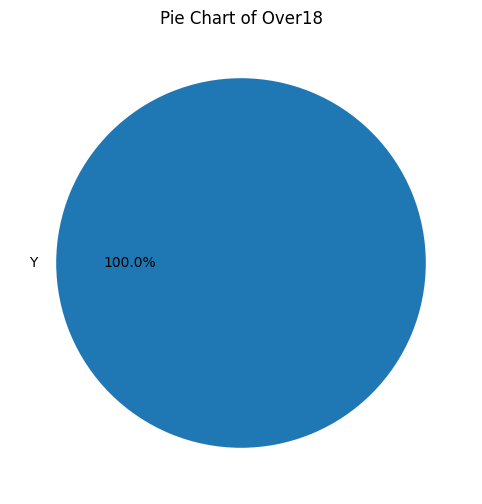

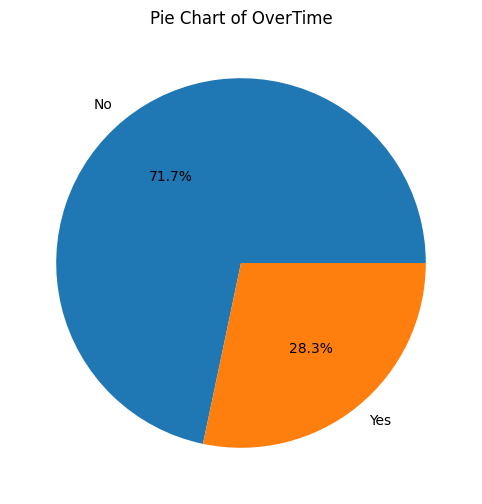

In [17]:
# Pie Chart for Categorical Columns
import matplotlib.pyplot as plt

# Pie Chart for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()


Comment: 1. The pie chart for Attrition show the proportion of employees who have left the company v/s those who have stayed. 
         the chart shows a less proportion of attrition, around 83% not leaving the organization and 16% leaving it.
        2. for BusinessTravel we see the distribution of employees'that shows travel frequency. we csn see that most employees, 
           that is around 71% employees travels rarely.
       3.for Department we see the distribution of employees across different departments like Sales, Research & Development, Human Resources.
          Among which there are around 65% employees from Research and Develpoment team/Department, followed by 30% sales and 4% HR.
       4. for EducationField we see the educational background of employees, wherein most employees are from life sciences, 31% medical 
          and 10% marketing etc.
       5. for Gender we see that, 60% male employees and 40% female.
       6. for OverTime we see the proportion of employees who work overtime.There are 28% employees who work overtime.

# Bivariate Analysis

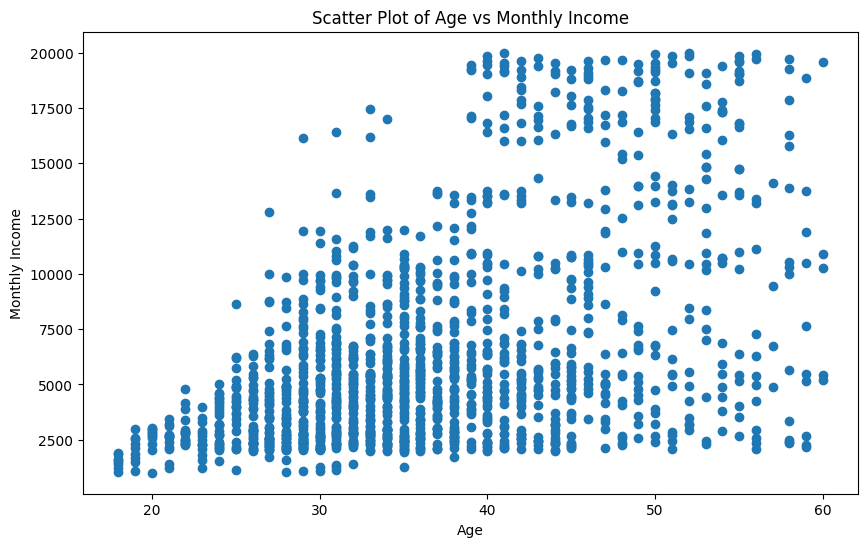

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Age vs Monthly Income')
plt.show()


Comment: There is a negative correlation between age and monthly income in this scatter plot. This means that as age increases, monthly income tends to decrease for few points.

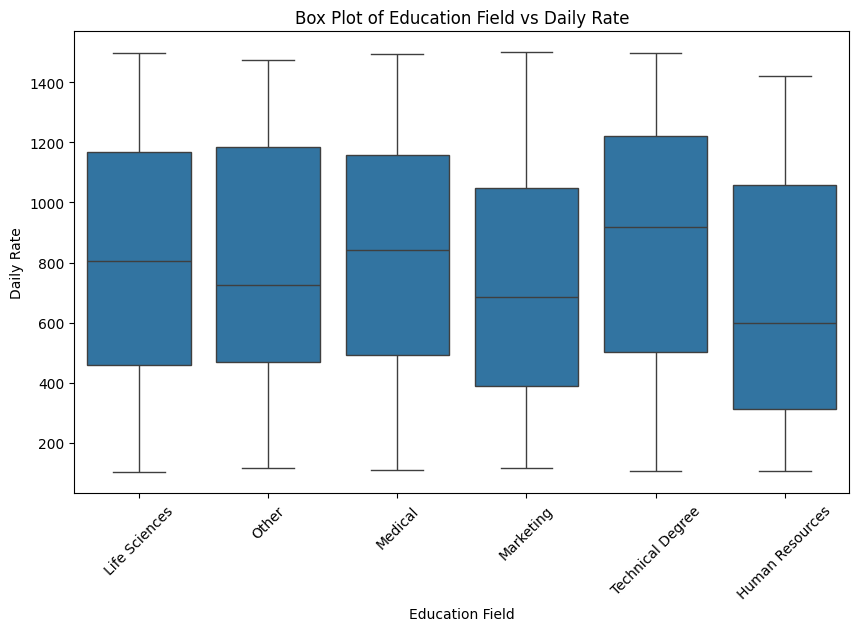

In [23]:
#  Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EducationField', y='DailyRate', data=data)
plt.xlabel('Education Field')
plt.ylabel('Daily Rate')
plt.title('Box Plot of Education Field vs Daily Rate')
plt.xticks(rotation=45)
plt.show()


Comment: The median daily rate is highest for those in the “Medical” field and lowest in “Life Sciences”.
         we cann see a large spread of daily rates in “Technical Degree” and “Marketing” fields compared to others.

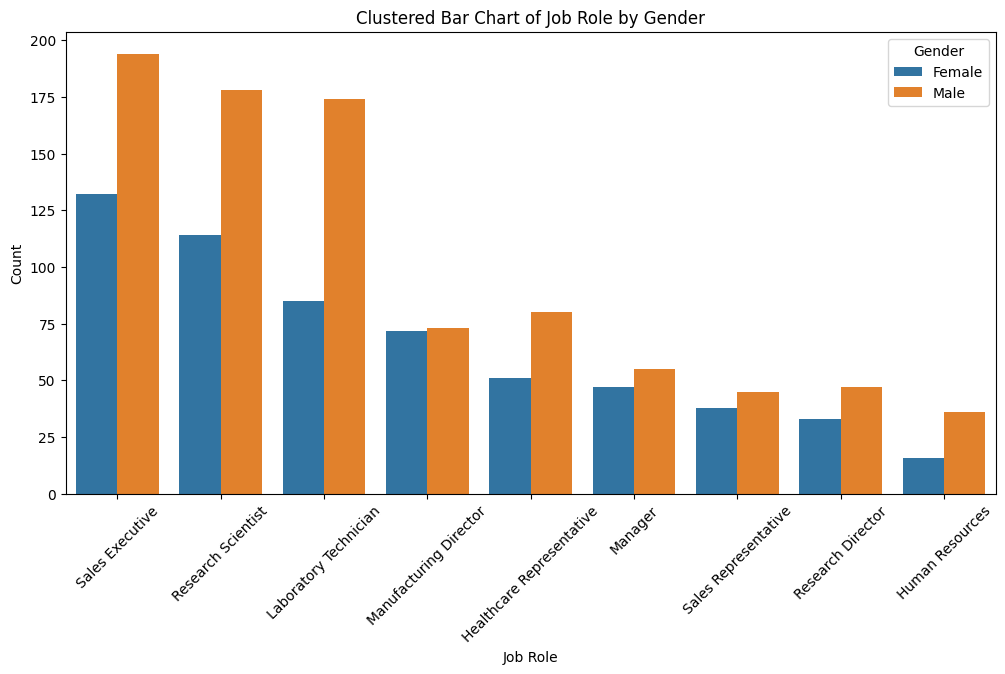

In [25]:
# Clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Gender', data=data)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Clustered Bar Chart of Job Role by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


Comment: There are more males than females working in all the job roles .
         The biggest difference in the number of males and females is in the job of Sales,Research Scientist, Healthcare Representative, 
         where there are many more males than females.

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_14084\313849090.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:b'` for the same effect.

  sns.countplot(x='Attrition', hue='Gender',color ='b', data=data)


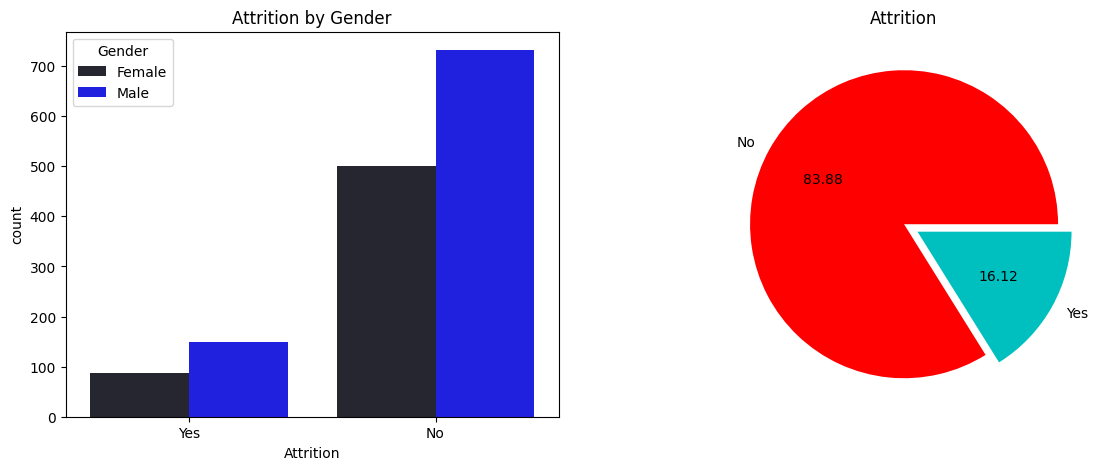

In [29]:
#Attrition by Gender
plt.figure(figsize=(14, 5))

# Subplot 1: Countplot of Attrition by Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Attrition', hue='Gender',color ='b', data=data)
plt.title('Attrition by Gender')

# Subplot 2: Pie chart of Attrition
plt.subplot(1, 2, 2)
plt.pie(data['Attrition'].value_counts(), colors=['r', 'c'], explode=[0, 0.1], autopct='%.2f', labels=['No', 'Yes'])
plt.title('Attrition')
plt.show()


Comment:We can see that,there are more males than females who left the company.

<Axes: xlabel='count', ylabel='JobRole'>

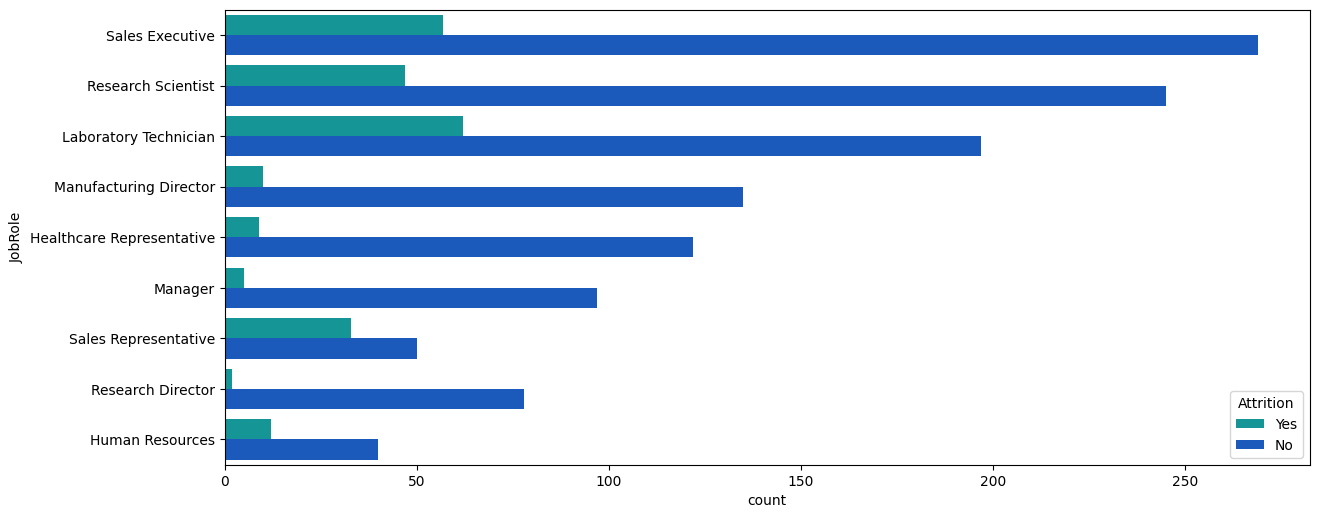

In [31]:
plt.figure(figsize = (14 , 13))
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = data ,palette='winter_r'  ,hue =data['Attrition'])

Comment: The most common job role is “Sales Executive", Scientist, lab technician, and we can see that, most of the employees from 
        these departments have left the organization..

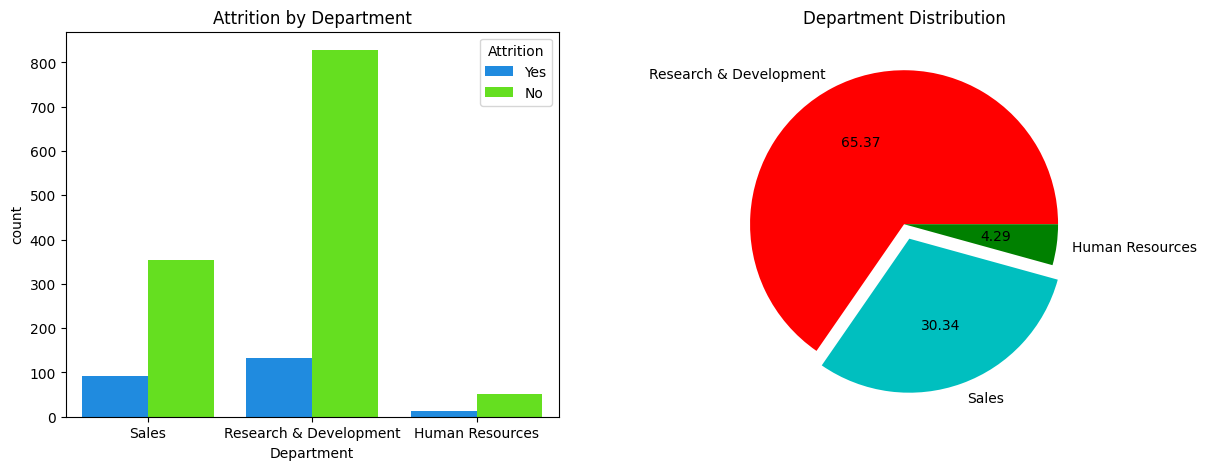

In [36]:
plt.figure(figsize=(14, 5))

# Subplot 1: Countplot of Attrition by Department
plt.subplot(1, 2, 1)
sns.countplot(x='Department', data=data, hue='Attrition', palette='gist_rainbow_r')
plt.title('Attrition by Department')

# Subplot 2: Pie chart of Department distribution
plt.subplot(1, 2, 2)
plt.pie(data['Department'].value_counts(), autopct='%.2f', colors=['r', 'c', 'g'], labels=['Research & Development', 'Sales', 'Human Resources'], explode=[0, 0.1, 0])
plt.title('Department Distribution')
plt.show()


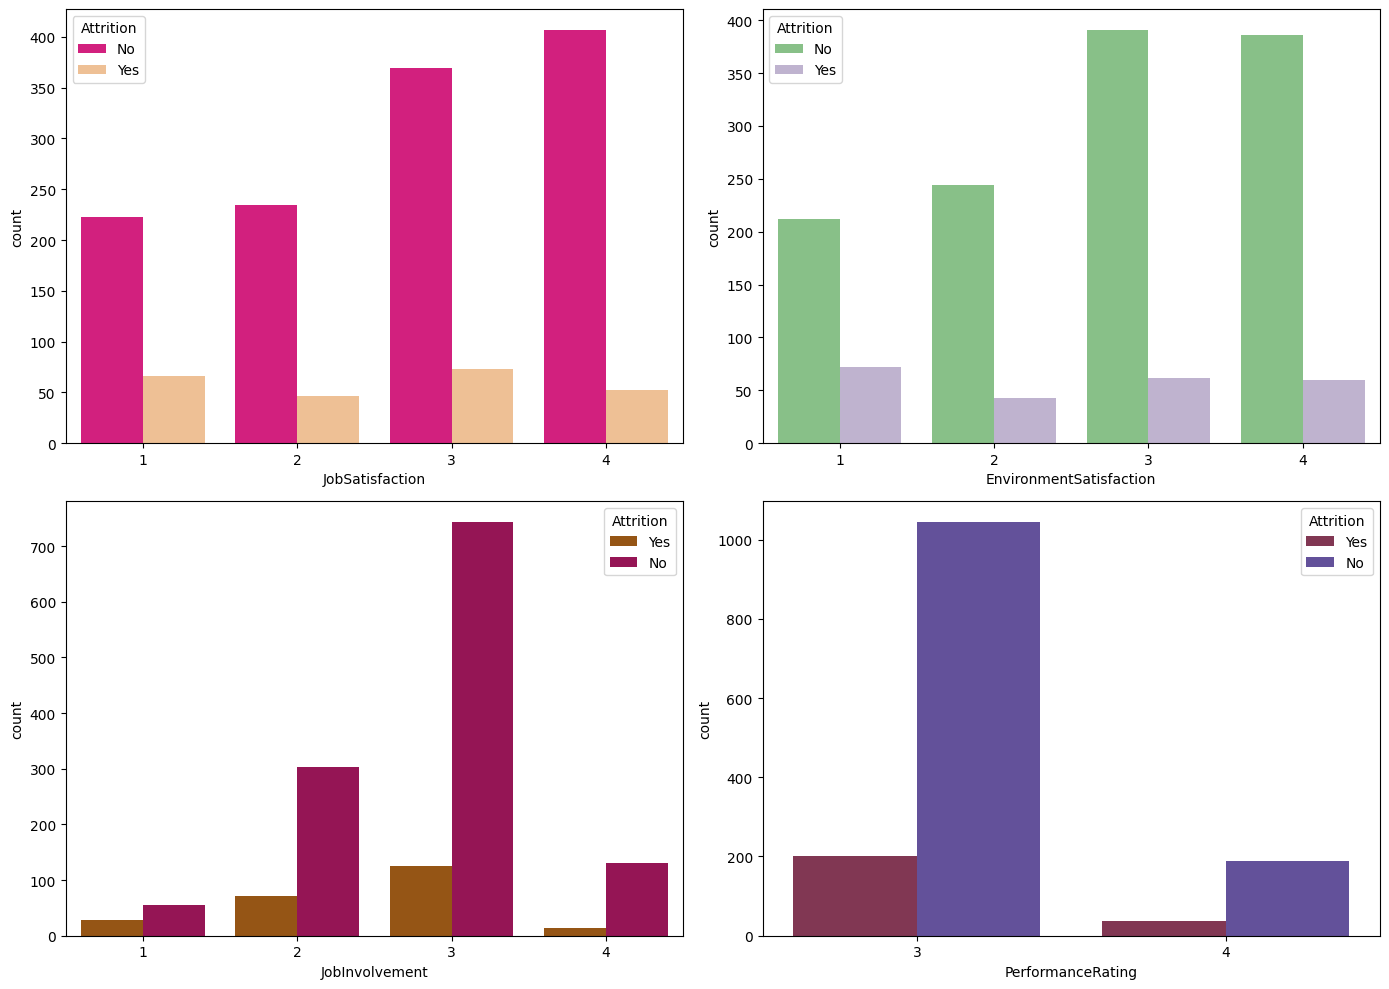

In [37]:
plt.figure(figsize=(14, 10))

# Subplot 1: Countplot of JobSatisfaction by Attrition
plt.subplot(2, 2, 1)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data, palette='Accent_r')

# Subplot 2: Countplot of EnvironmentSatisfaction by Attrition
plt.subplot(2, 2, 2)
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data, palette='Accent')

# Subplot 3: Countplot of JobInvolvement by Attrition
plt.subplot(2, 2, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=data, palette='brg_r')

# Subplot 4: Countplot of PerformanceRating by Attrition
plt.subplot(2, 2, 4)
sns.countplot(x='PerformanceRating', hue='Attrition', data=data, palette='twilight_r')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# INSIGHTS

# OBJECTIVES

# 1.To Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company.

# Logistic Regression

#Data preprocessing

In [42]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [43]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Splitting the data into training and testing sets (80% training, 20% testing)

In [44]:
# Splitting the data into training and testing sets
X = data.drop(columns=['Attrition']) # For independent vars
y = data['Attrition'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [46]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation of the Model

In [48]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.891156462585034

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294


Confusion Matrix:
 [[249   6]
 [ 26  13]]


# 2.To Identify Key Factors Influencing Employee Attrition.

# Random Forest Regression for Feature Importance

In [50]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predicting
y_pred = rf_model.predict(X_test)

In [52]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8673469387755102


In [53]:
# Feature Importance Analysis
importances = rf_model.feature_importances_
feature_names = X.columns

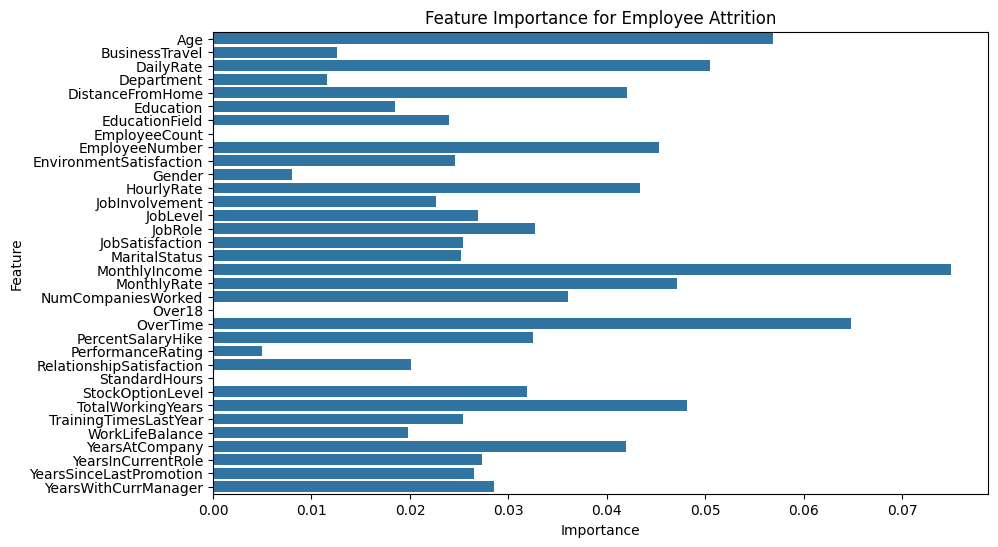

In [54]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Employee Attrition')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Conclusion

1. Accuracy: The accuracy of the model is approximately 89.12%. This shows that, that the model correctly predicts the attrition status of employees 
             approximately 89.12% of the time.
   Precision: Precision for employees not leaving the company is 91%. This means that out of all the employees predicted as not leaving the company,
              91% were correctly classified.
              Precision for employees leaving the company is 68%. This means that out of all the employees predicted as leaving the company,
              68% were correctly classified.
   Recall: Recall for class 0 is 98%. This means that out of all the employees who actually did not leave the company, 
           98% were correctly identified by the model.
           Recall for class 1 is 33%. This means that out of all the employees who actually left the company, 
           only 33% were correctly identified by the model.
   F1-score: we know that, The F1-score is the harmonic mean of precision and recall. The  F1-score for the model is approximately 0.87.

   Confusion Matrix: 
                True negatives (TN): 249
                False positives (FP): 6
                False negatives (FN): 26
                True positives (TP): 13
  From the confusion matrix, we can see that the model correctly predicted 249 employees who did not leave the company
                           and 13 employees who did leave the company.
                            And, it incorrectly classified 6 employees who actually left, as not leaving the organization 
                            and 26 employees who actually did not leave , as leaving the organization.

   Hence, the model has a high accuracy, it seems to have a higher precision and recall for employees who did not leave the company 
   compared to those who did. 
   This suggests that the model might be better at identifying employees,  who are likely to stay rather than those,  who are likely to
   leave the organization.

2. The bar chart shows that "Monthly Income" is the most influential factor for employee attrition, followed by "Overtime," "Age," and "Daily Rate." 
   It implies that factors like income, work hours, and age play a important role in predicting whether an employee will leave the company.
    Also, aspects of job tenure, like total working years and years at the company, also contribute to the likelihood of attrition.
   Other features also have impact but have less impact on predicting attrition compared to these above  important factors.